In [7]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/loan_data.csv')

print("Columns:", df.columns.tolist())
print(df.head())
print(df['loan_status'].value_counts())


Columns: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL

In [8]:
# Label is already numeric: 1 = approved, 0 = not approved

# Separate features and label
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Find categorical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encode categoricals
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("After encoding, features shape:", X.shape)


Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
After encoding, features shape: (45000, 22)


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", x_train.shape, "Validation shape:", x_val.shape)


Train shape: (36000, 22) Validation shape: (9000, 22)


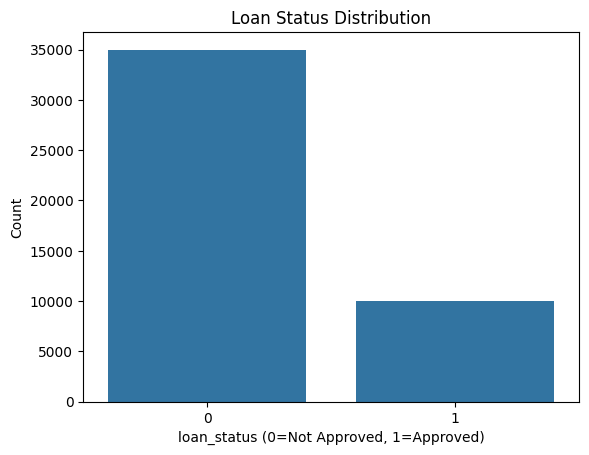

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Loan Status Distribution")
plt.xlabel("loan_status (0=Not Approved, 1=Approved)")
plt.ylabel("Count")
plt.show()


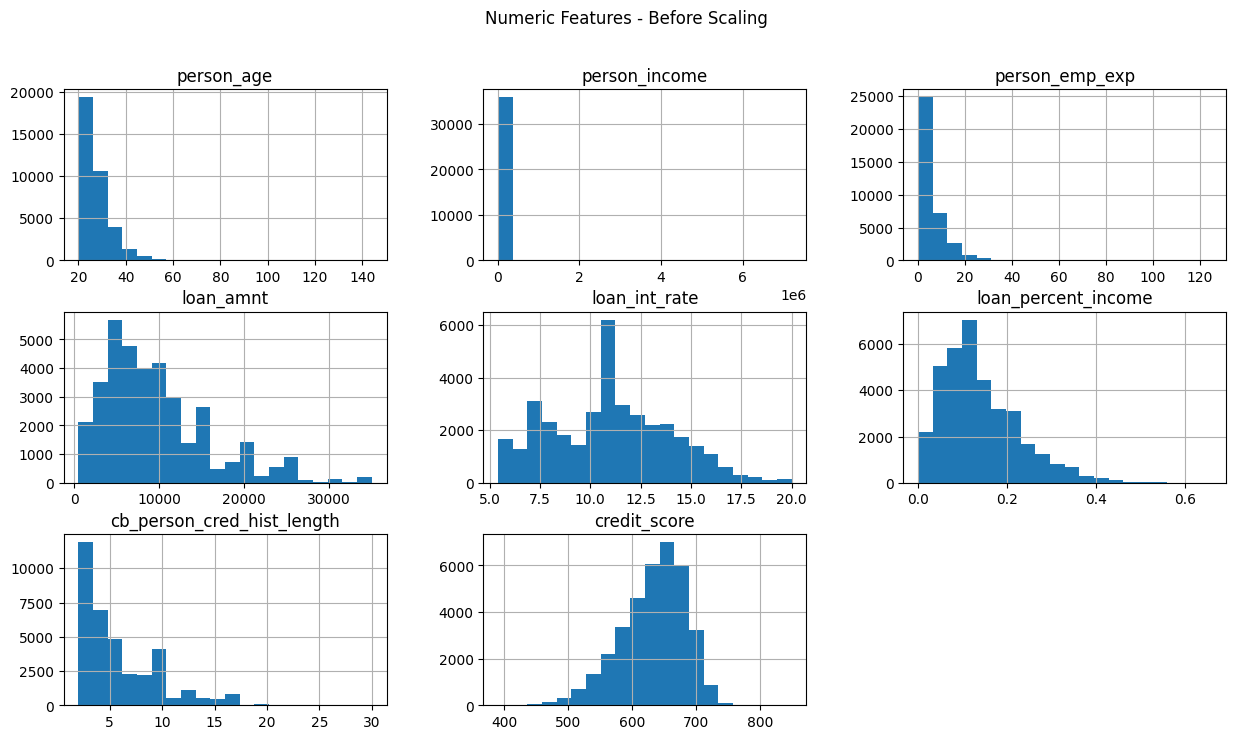

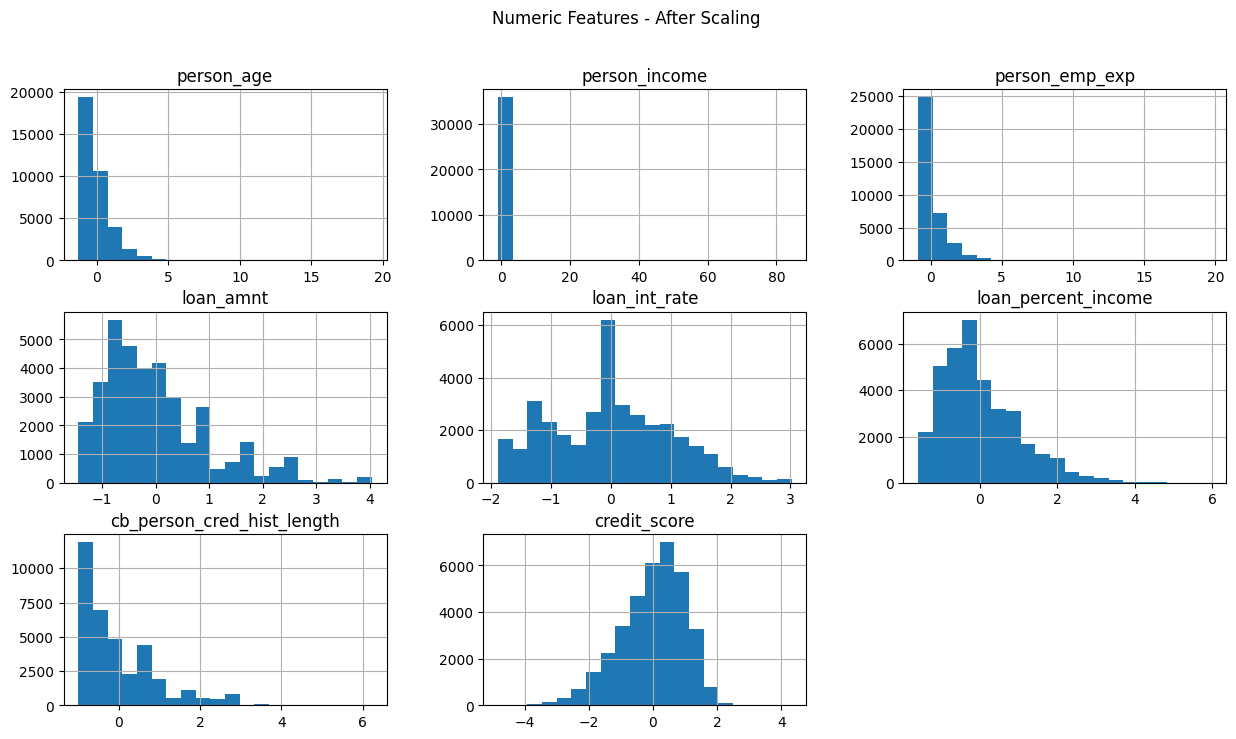

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

# Before scaling
x_train[numeric_cols].hist(bins=20, figsize=(15,8))
plt.suptitle("Numeric Features - Before Scaling")
plt.show()

# Scale
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_val_scaled = x_val.copy()
x_train_scaled[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_val_scaled[numeric_cols] = scaler.transform(x_val[numeric_cols])

# After scaling
pd.DataFrame(x_train_scaled, columns=x_train.columns)[numeric_cols].hist(bins=20, figsize=(15,8))
plt.suptitle("Numeric Features - After Scaling")
plt.show()


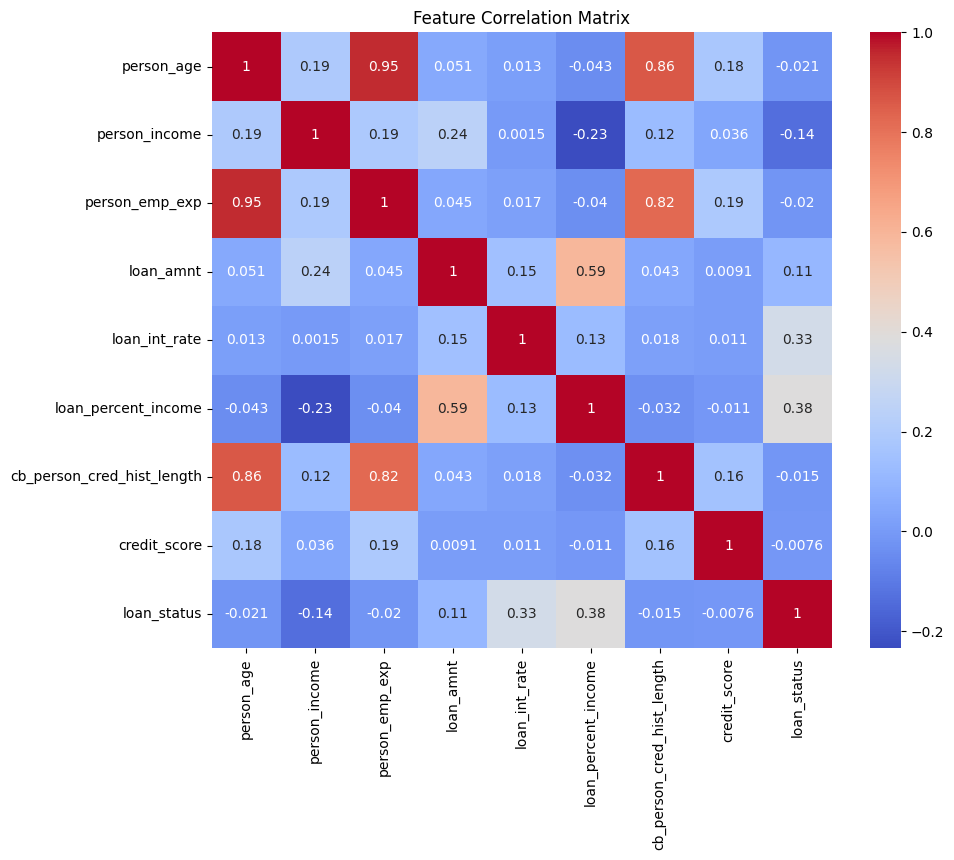

In [12]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


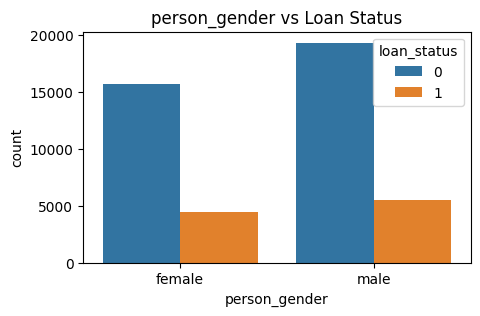

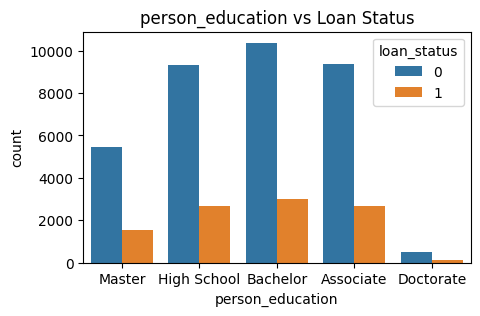

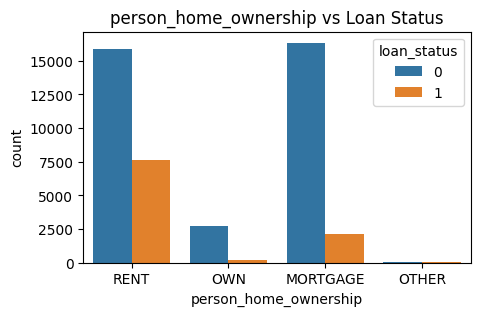

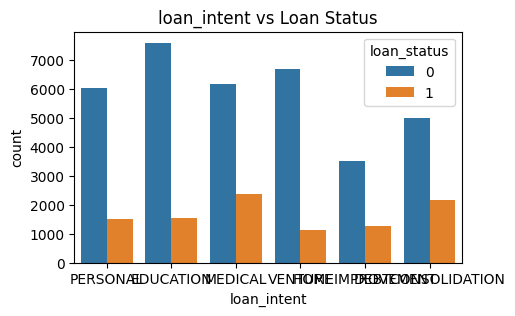

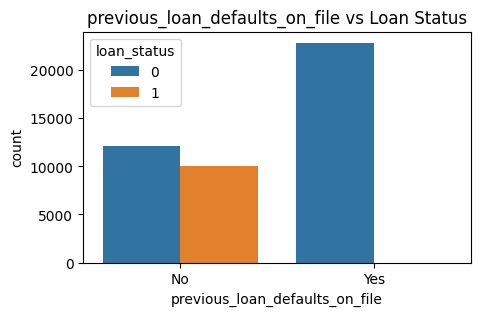

In [13]:
# For each original categorical variable
cat_orig = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for col in cat_orig:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=6, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, max_iter=2000)
}


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


=== Validation Results for Each Model ===
              Model  Accuracy  Precision  Recall     F1
Logistic Regression    0.8994     0.7892  0.7470 0.7675
      Decision Tree    0.9120     0.8643  0.7165 0.7835
      Random Forest    0.9191     0.9046  0.7110 0.7962
                KNN    0.9007     0.8124  0.7190 0.7629
        Naive Bayes    0.8060     0.6568  0.2660 0.3786
                SVM    0.7651     0.4845  0.8915 0.6278


,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.8994,0.7892,0.7470,0.7675
1,Decision Tree,0.9120,0.8643,0.7165,0.7835
2,Random Forest,0.9191,0.9046,0.7110,0.7962
3,KNN,0.9007,0.8124,0.7190,0.7629
4,Naive Bayes,0.8060,0.6568,0.2660,0.3786
5,SVM,0.7651,0.4845,0.8915,0.6278


<ipython-input-15-36a8d4aad20e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
<ipython-input-15-36a8d4aad20e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
<ipython-input-15-36a8d4aad20e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
<ipython-input-15-36a8d4aad20e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

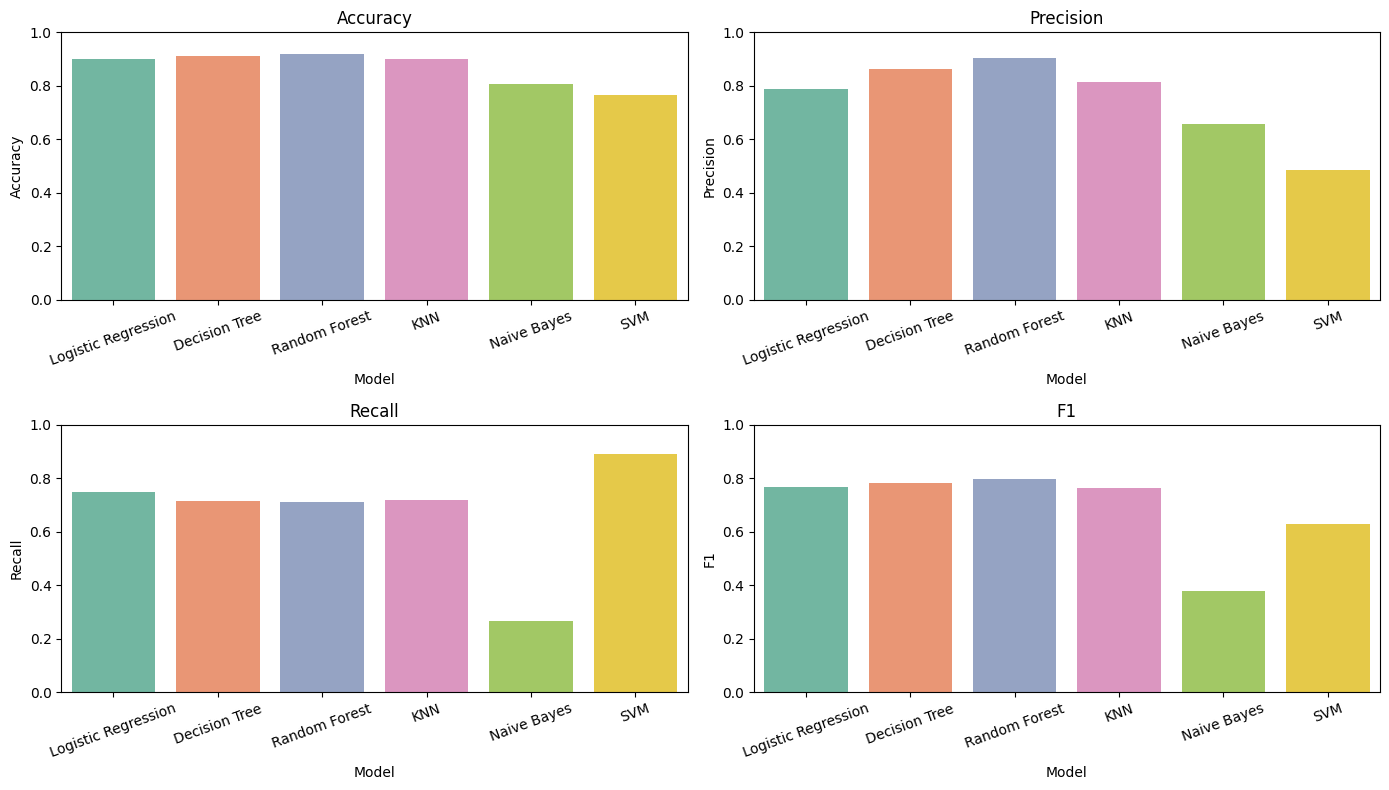

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []
for name, model in models.items():
    # Use scaled data for LR, SVM, KNN; raw for tree/naive bayes
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(x_train_scaled, y_train)
        preds = model.predict(x_val_scaled)
    else:
        model.fit(x_train, y_train)
        preds = model.predict(x_val)
    acc = accuracy_score(y_val, preds)
    prec = precision_score(y_val, preds)
    rec = recall_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

results_df = pd.DataFrame(results)

# Print the metrics table as text
print("=== Validation Results for Each Model ===")
print(results_df.to_string(index=False, float_format='%.4f'))

# Pretty table if in Jupyter/Colab
try:
    display(results_df.style.format(precision=4).set_caption("Validation Results for Each Model"))
except:
    pass

# Metrics bar plots
metrics = ["Accuracy", "Precision", "Recall", "F1"]
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x="Model", y=metric, data=results_df, palette="Set2")
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


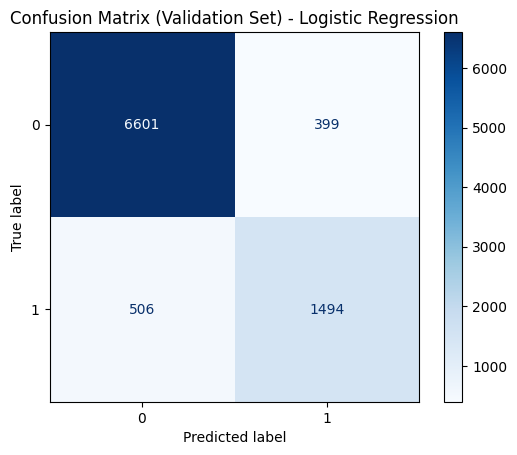

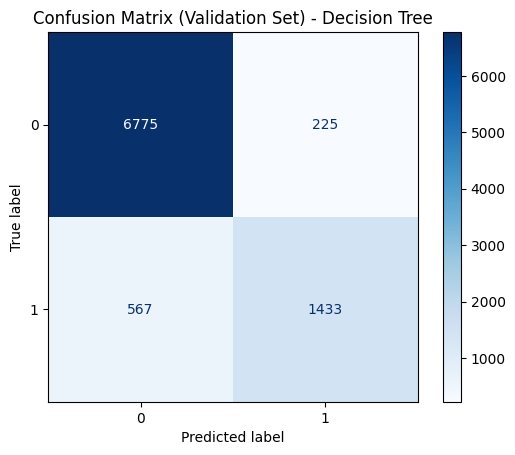

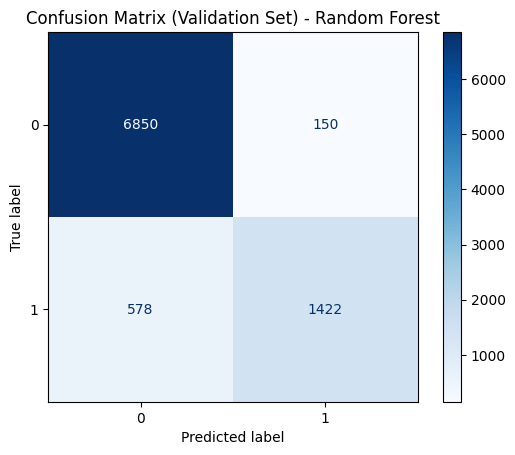

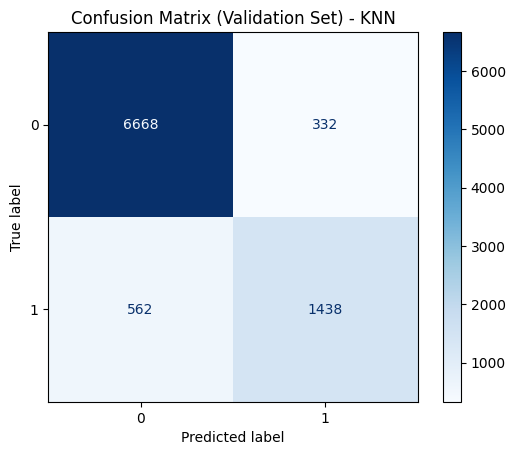

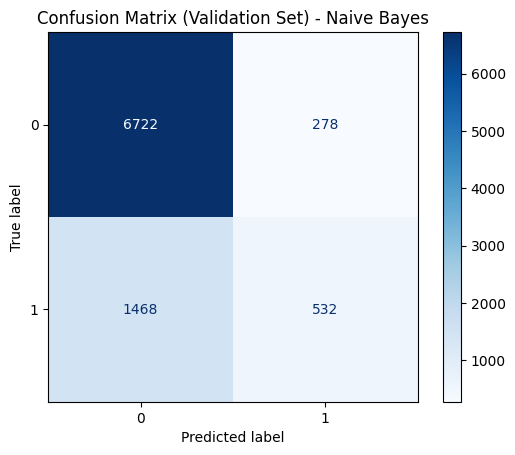

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


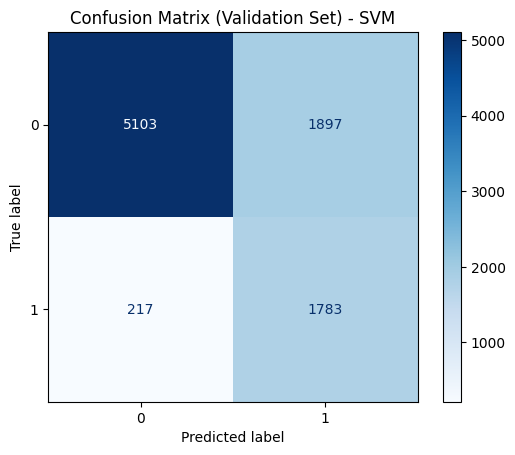

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(x_train_scaled, y_train)
        preds = model.predict(x_val_scaled)
    else:
        model.fit(x_train, y_train)
        preds = model.predict(x_val)
    cm = confusion_matrix(y_val, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix (Validation Set) - {name}')
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


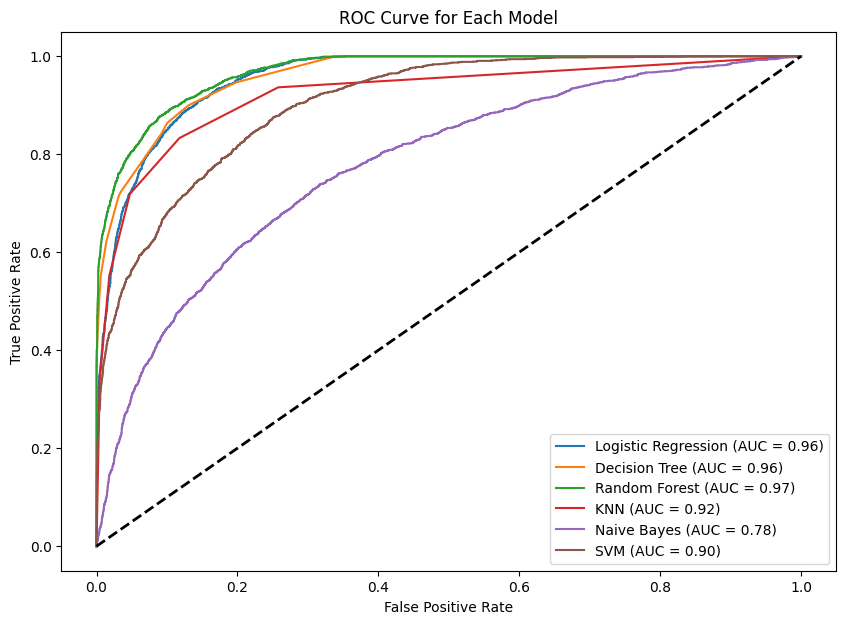

In [17]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))
for name, model in models.items():
    if name in ["Logistic Regression", "SVM", "KNN"]:
        model.fit(x_train_scaled, y_train)
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(x_val_scaled)[:, 1]
        else:
            # SVM (if not probability enabled)
            probs = (model.decision_function(x_val_scaled) - model.decision_function(x_val_scaled).min()) / (model.decision_function(x_val_scaled).ptp())
    else:
        model.fit(x_train, y_train)
        probs = model.predict_proba(x_val)[:, 1] if hasattr(model, "predict_proba") else None

    if probs is not None:
        fpr, tpr, _ = roc_curve(y_val, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Each Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
